In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from keras.src.layers import Dense
from keras.src.layers import LSTM, Dropout
from keras.src.optimizers import Adam
from keras.src.callbacks import ModelCheckpoint, EarlyStopping
import math
from sklearn.metrics import mean_squared_error
import datetime
import mplfinance as mpf
import math 
import os

In [28]:

df = pd.read_csv('data/historical_data/VKCO_1h.csv')
print(df.head())

df

                        Time   Open   High    Low  Close  Volume
0  2023-05-24 17:00:00+00:00  541.4  543.8  541.0  543.8   15497
1  2023-05-24 18:00:00+00:00  543.4  543.8  542.0  542.6   14255
2  2023-05-24 19:00:00+00:00  542.8  544.0  542.0  543.0   32165
3  2023-05-24 20:00:00+00:00  542.6  544.0  540.0  543.0   37079
4  2023-05-25 06:00:00+00:00  544.2  544.2  544.2  544.2    2610


,Time,Open,High,Low,Close,Volume
0,2023-05-24 17:00:00+00:00,541.4,543.8,541.0,543.8,15497
1,2023-05-24 18:00:00+00:00,543.4,543.8,542.0,542.6,14255
2,2023-05-24 19:00:00+00:00,542.8,544.0,542.0,543.0,32165
3,2023-05-24 20:00:00+00:00,542.6,544.0,540.0,543.0,37079
4,2023-05-25 06:00:00+00:00,544.2,544.2,544.2,544.2,2610
...,...,...,...,...,...,...
4418,2024-05-23 12:00:00+00:00,609.8,613.0,609.8,612.0,106940
4419,2024-05-23 13:00:00+00:00,612.2,614.8,610.6,614.0,133181
4420,2024-05-23 14:00:00+00:00,614.0,616.2,612.6,614.8,166710
4421,2024-05-23 15:00:00+00:00,615.0,615.0,612.6,612.8,112108


In [29]:
df['Time']

0       2023-05-24 17:00:00+00:00
1       2023-05-24 18:00:00+00:00
2       2023-05-24 19:00:00+00:00
3       2023-05-24 20:00:00+00:00
4       2023-05-25 06:00:00+00:00
                  ...            
4418    2024-05-23 12:00:00+00:00
4419    2024-05-23 13:00:00+00:00
4420    2024-05-23 14:00:00+00:00
4421    2024-05-23 15:00:00+00:00
4422    2024-05-23 16:00:00+00:00
Name: Time, Length: 4423, dtype: object

In [30]:
import datetime

def str_to_datetime(s):
    date_part, time_part = s.split(' ')[0], s.split(' ')[1].split('+')[0]
    year, month, day = map(int, date_part.split('-'))
    hour, _, _ = map(int, time_part.split(':'))
    
    return datetime.datetime(year=year, month=month, day=day, hour=hour, minute=0, second=0)

datetime_object = str_to_datetime('2023-05-22 12:00:00+00:00')
print(datetime_object)


2023-05-22 12:00:00


In [31]:
df

,Time,Open,High,Low,Close,Volume
0,2023-05-24 17:00:00+00:00,541.4,543.8,541.0,543.8,15497
1,2023-05-24 18:00:00+00:00,543.4,543.8,542.0,542.6,14255
2,2023-05-24 19:00:00+00:00,542.8,544.0,542.0,543.0,32165
3,2023-05-24 20:00:00+00:00,542.6,544.0,540.0,543.0,37079
4,2023-05-25 06:00:00+00:00,544.2,544.2,544.2,544.2,2610
...,...,...,...,...,...,...
4418,2024-05-23 12:00:00+00:00,609.8,613.0,609.8,612.0,106940
4419,2024-05-23 13:00:00+00:00,612.2,614.8,610.6,614.0,133181
4420,2024-05-23 14:00:00+00:00,614.0,616.2,612.6,614.8,166710
4421,2024-05-23 15:00:00+00:00,615.0,615.0,612.6,612.8,112108


In [32]:
df['Time'] = df['Time'].apply(str_to_datetime)
df['Time']

0      2023-05-24 17:00:00
1      2023-05-24 18:00:00
2      2023-05-24 19:00:00
3      2023-05-24 20:00:00
4      2023-05-25 06:00:00
               ...        
4418   2024-05-23 12:00:00
4419   2024-05-23 13:00:00
4420   2024-05-23 14:00:00
4421   2024-05-23 15:00:00
4422   2024-05-23 16:00:00
Name: Time, Length: 4423, dtype: datetime64[ns]

In [33]:
df.columns

Index(['Time', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

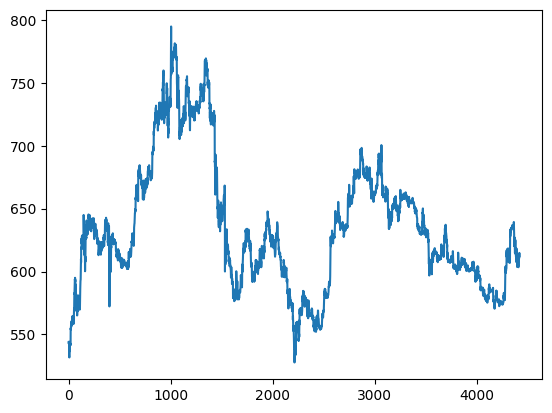

In [34]:
plt.plot(df.index, df['Close'])

In [35]:
def specific_data(start, end):
    data = df
    filtered_data = data[(data['Time'] >= start) & (data['Time'] <= end)]
    return filtered_data

In [36]:
print(df.columns)

Index(['Time', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [37]:
start_time= '2023-01-01 09:00:00'
end_time='2024-05-10 06:00:00'

spec_df = specific_data(start_time, end_time)
spec_df

,Time,Open,High,Low,Close,Volume
0,2023-05-24 17:00:00,541.4,543.8,541.0,543.8,15497
1,2023-05-24 18:00:00,543.4,543.8,542.0,542.6,14255
2,2023-05-24 19:00:00,542.8,544.0,542.0,543.0,32165
3,2023-05-24 20:00:00,542.6,544.0,540.0,543.0,37079
4,2023-05-25 06:00:00,544.2,544.2,544.2,544.2,2610
...,...,...,...,...,...,...
4217,2024-05-09 17:00:00,576.4,576.8,575.8,576.6,1032
4218,2024-05-09 18:00:00,576.6,576.6,575.4,575.6,548
4219,2024-05-09 19:00:00,576.6,576.6,575.6,576.0,458
4220,2024-05-09 20:00:00,576.4,576.6,576.0,576.6,252


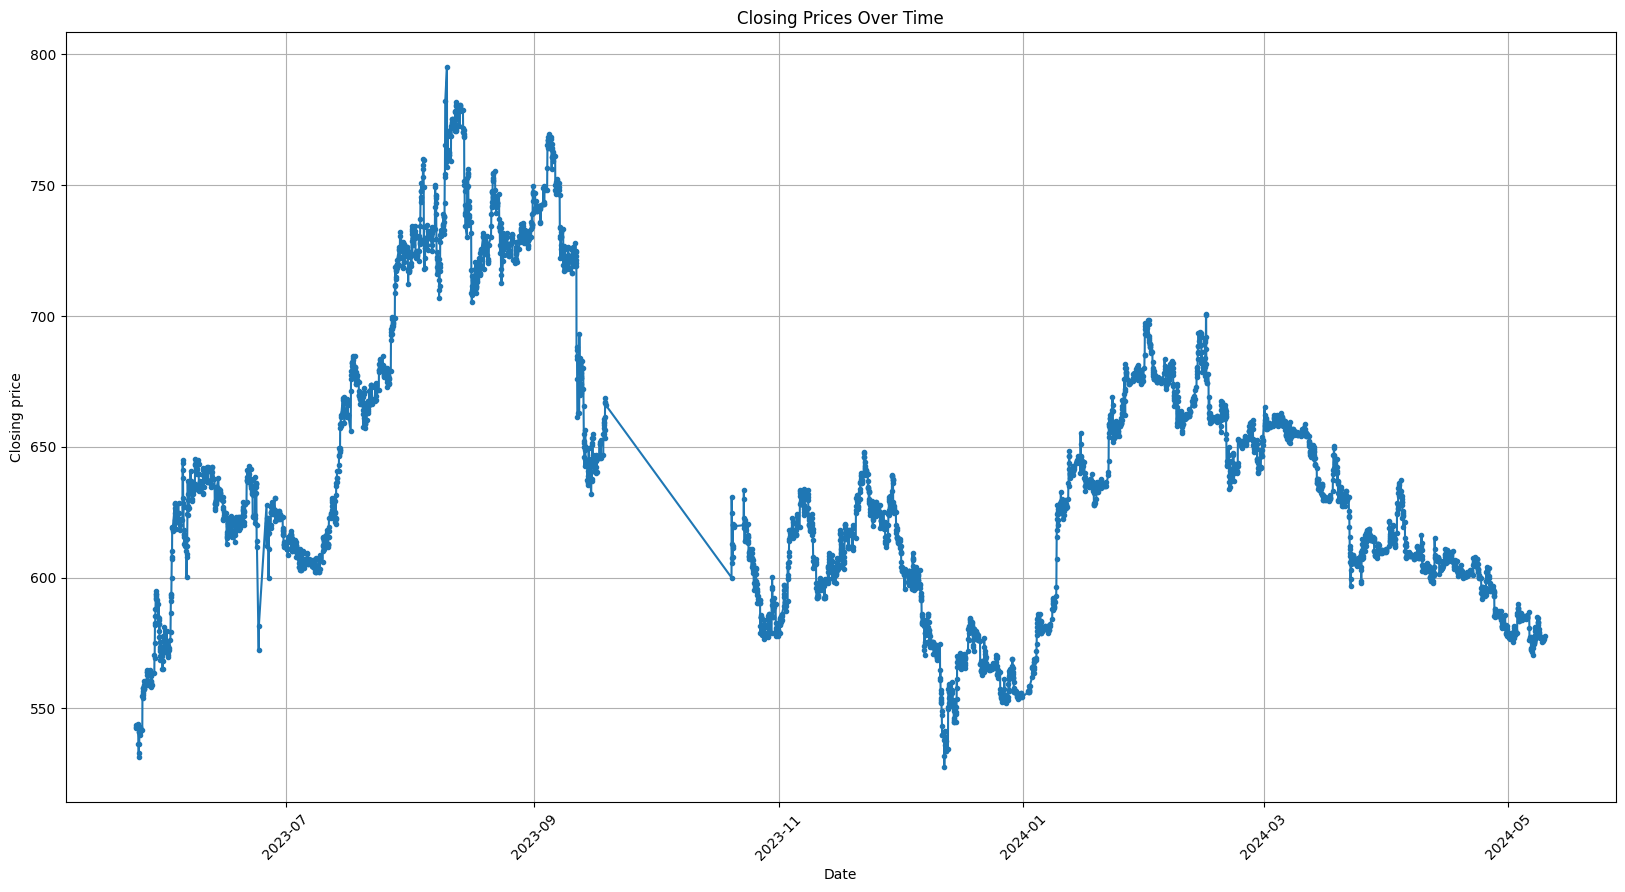

In [38]:
plt.figure(figsize=(20, 10))
plt.plot(spec_df['Time'], spec_df['Close'], marker='.')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

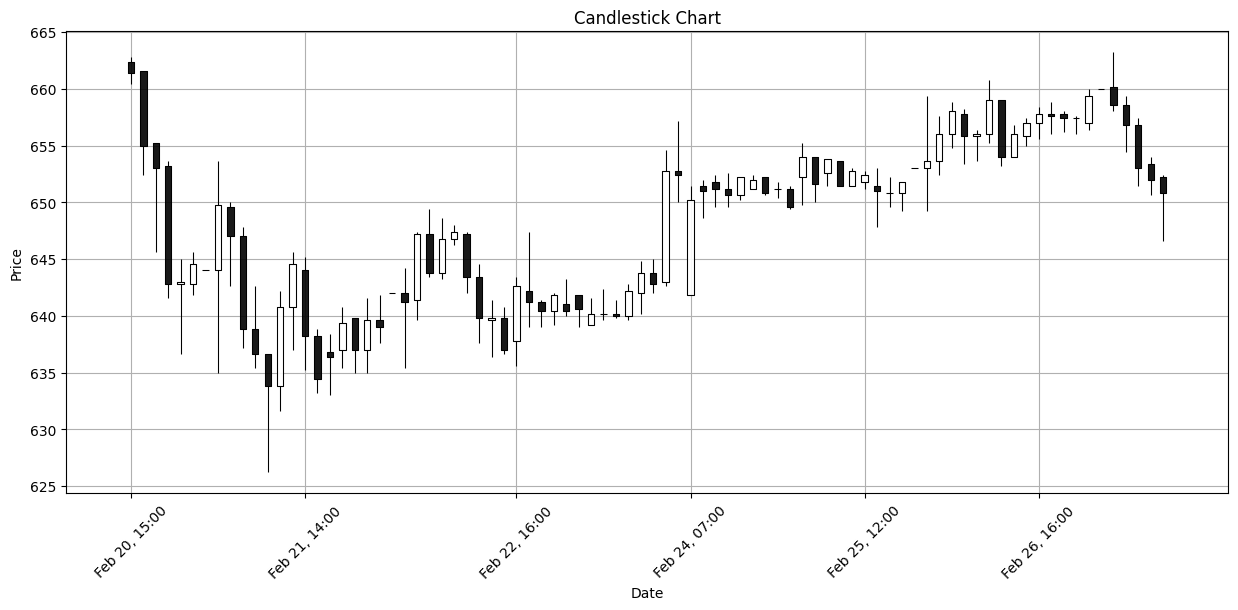

In [39]:
specc_df = specific_data('2024-02-20 15:00:00', '2024-02-27 11:00:00')
specc_df.loc[:, 'Time'] = pd.to_datetime(specc_df['Time'])
mat_date = mdates.date2num(specc_df['Time'])

ohlc = np.vstack((mat_date, specc_df['Open'], specc_df['High'], specc_df['Low'], specc_df['Close'])).T

fig, ax = plt.subplots(figsize=(15, 6))

mpf.plot(specc_df.set_index('Time'), type='candle', ax=ax)

ax.xaxis_date()
plt.title('Candlestick Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


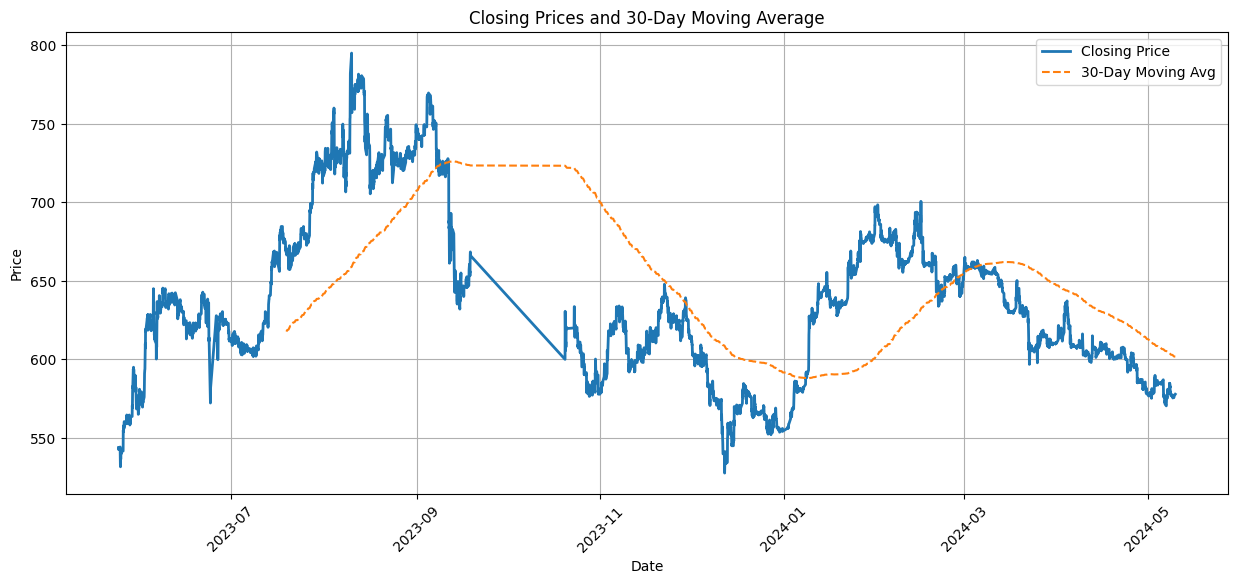

In [40]:
window_days = 30
window_hours = window_days * 24

plt.figure(figsize=(15, 6))
plt.plot(spec_df['Time'], spec_df['Close'], label='Closing Price', linewidth=2)
plt.plot(spec_df['Time'], spec_df['Close'].rolling(window=window_hours).mean(), label=f'{window_days}-Day Moving Avg', linestyle='--')

plt.title(f'Closing Prices and {window_days}-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


/var/folders/f0/zwtts9w11p52b78sr6n20nwc0000gn/T/ipykernel_20879/1362703940.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



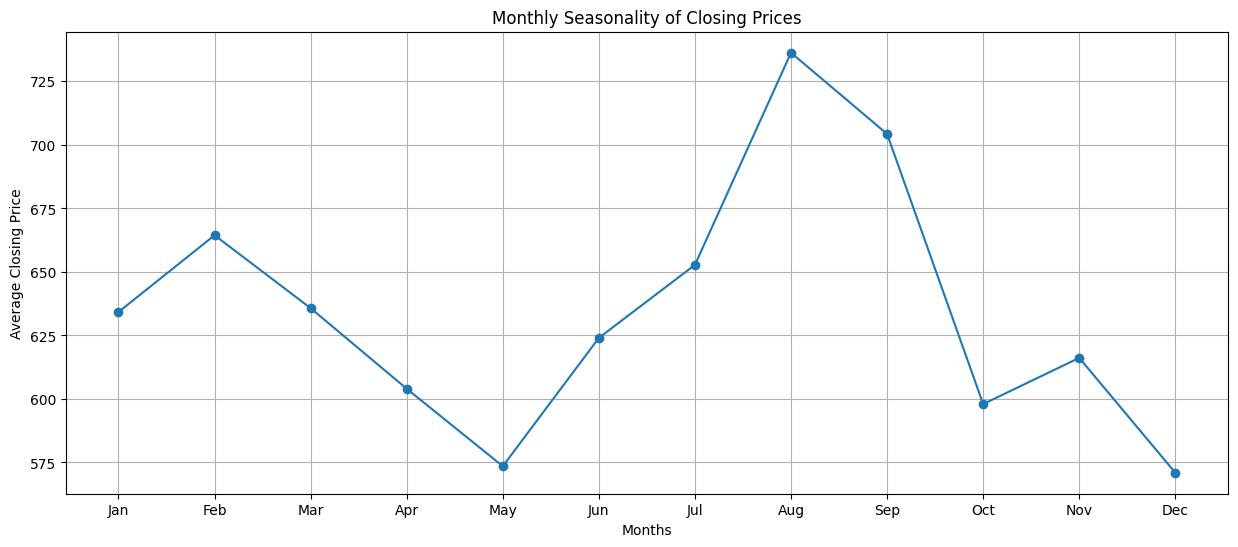

In [41]:
spec_df.loc[:, 'Time'] = pd.to_datetime(spec_df['Time'])

spec_df.loc[:, 'Month'] = spec_df['Time'].dt.month

monthly_average = spec_df.groupby('Month')['Close'].mean()

plt.figure(figsize=(15, 6))
plt.plot(monthly_average.index, monthly_average.values, marker='o')
plt.title('Monthly Seasonality of Closing Prices')
plt.xlabel('Months')
plt.ylabel('Average Closing Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


In [42]:
new_df = spec_df.reset_index()['Close']

In [43]:
scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(np.array(new_df).reshape(-1,1))

In [44]:
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [45]:
n_past = 100

X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)


In [46]:
print("Traning set size:-")
print(X_train.shape), print(y_train.shape)
print('\n')
print("Testing set size:-")
print(X_test.shape), print(y_train.shape)

Traning set size:-
(3277, 100)
(3277,)


Testing set size:-
(745, 100)
(3277,)


(None, None)

In [47]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [48]:
look_back = 300

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=128))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
checkpoints = ModelCheckpoint(filepath='my_weights.keras', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1, callbacks=[checkpoints, early_stopping])

last_sequence = X_test[-1].reshape(1, look_back, 1)
predictions_next_240_hours = []
for _ in range(240):
    next_hour_prediction = model.predict(last_sequence)
    predictions_next_240_hours.append(next_hour_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_hour_prediction

predictions_next_240_hours = scaler.inverse_transform(np.array(predictions_next_240_hours).reshape(-1, 1))

import plotly.graph_objects as go

real_data_last_240_hours = specific_data('2024-05-10 06:00:00', '2024-05-20 06:00:00')
real_dates = pd.to_datetime(real_data_last_240_hours['Time'])
predicted_dates = pd.date_range(start=real_dates.iloc[-1] + pd.Timedelta(hours=1), periods=240, freq='H')

fig = go.Figure()
fig.add_trace(go.Scatter(x=real_dates, y=real_data_last_240_hours['Close'], mode='lines', name='Actual Prices (Last 10 Days)', line=dict(color='black')))
fig.add_trace(go.Scatter(x=predicted_dates, y=predictions_next_240_hours.flatten(), mode='lines+markers', name='Predicted Prices (Next 10 Days)', line=dict(color='blue')))
fig.update_layout(title='Actual vs Predicted Stock Prices', xaxis_title='Time', yaxis_title='Price', legend=dict(x=0, y=1), template='plotly_white')
fig.show()


Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 212ms/step - loss: 0.0419 - val_loss: 3.3367e-04
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 209ms/step - loss: 0.0025 - val_loss: 2.9209e-04
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 203ms/step - loss: 0.0020 - val_loss: 3.1739e-04
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - loss: 0.0019 - val_loss: 2.5536e-04
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - loss: 0.0019 - val_loss: 2.7380e-04
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 212ms/step - loss: 0.0019 - val_loss: 2.3359e-04
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - loss: 0.0017 - val_loss: 3.5469e-04
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 211ms/step - loss: 0.0017 - val_loss: 3.7223e-04
Epoch 9/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 200ms/step - loss: 0.0017 - val_loss: 2.0506e-04
Epoch 10/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 207ms/step - loss: 0.0014 - val_loss: 2.3786e-04
Epoch 11/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 216ms/step - loss: 0.0015 - val_loss: 2.5871e-0

KeyboardInterrupt: 

In [287]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_19 (LSTM)                  │ (None, 100, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 100, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, 100, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 100, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,701 (787.89 KB)

 Trainable params: 201,701 (787.89 KB)

 Non-trainable params: 0 (0.00 B)